<a href="https://colab.research.google.com/github/prijal-matc/takeovds41/blob/main/Imdb_low_ranked_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from collections import defaultdict

In [5]:
url = '/content/lowest_ranked_movies_data.csv'
df_movies = pd.read_csv(url)
df_movies

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars
0,1,Disaster Movie,2008,PG-13,1h 27m,1.9,94K,"['Jason Friedberg', 'Aaron Seltzer']","['Jason Friedberg', 'Aaron Seltzer']","['Comedy', 'Sci-Fi']","['Carmen Electra', 'Vanessa Lachey', 'Nicole P..."
1,2,Manos: The Hands of Fate,1966,Not Rated,1h 10m,1.6,37K,['Harold P. Warren'],['Harold P. Warren'],['Horror'],"['Tom Neyman', 'John Reynolds', 'Diane Adelson']"
2,3,Birdemic: Shock and Terror,2010,Not Rated,1h 45m,1.7,25K,['James Nguyen'],"['Writer', 'James Nguyen', '']","['Horror', 'Thriller']","['Alan Bagh', 'Whitney Moore', 'Tippi Hedren']"
3,4,Superbabies: Baby Geniuses 2,2004,PG,1h 28m,1.5,32K,['Bob Clark'],"['Writers', 'Robert Grasmere', 'Francisca Mato...","['Comedy', 'Family', 'Sci-Fi']","['Jon Voight', 'Scott Baio', 'Vanessa Angel']"
4,5,The Hottie & the Nottie,2008,PG-13,1h 31m,2.0,39K,['Tom Putnam'],['Heidi Ferrer'],"['Comedy', 'Romance']","['Paris Hilton', 'Joel David Moore', 'Christin..."
...,...,...,...,...,...,...,...,...,...,...,...
95,96,The Love Guru,2008,PG-13,1h 27m,3.8,54K,['Marco Schnabel'],"['Mike Myers', 'Graham Gordy']","['Comedy', 'Romance', 'Sport']","['Mike Myers', 'Jessica Alba', 'Romany Malco']"
96,97,The Hungover Games,2014,R,1h 25m,3.5,16K,['Josh Stolberg'],"['Writers', 'Kyle Barnett Anderson', 'David Be...","['Adventure', 'Comedy', 'Fantasy']","['Ben Begley', 'Herbert Russell', 'Ross Nathan']"
97,98,In the Name of the King: A Dungeon Siege Tale,2007,PG-13,2h 7m,3.8,51K,['Uwe Boll'],"['Writers', 'Doug Taylor', 'Jason Rappaport', ...","['Action', 'Adventure', 'Fantasy']","['Jason Statham', 'Ron Perlman', 'Ray Liotta']"
98,99,The Avengers,1998,PG-13,1h 29m,3.8,45K,['Jeremiah S. Chechik'],"['Sydney Newman', 'Don MacPherson']","['Action', 'Adventure', 'Sci-Fi']","['Ralph Fiennes', 'Uma Thurman', 'Sean Connery']"


In [6]:
df_movies.columns

Index(['rank', 'name', 'year', 'certification', 'duration', 'rating',
       'review_count', 'director', 'writer', 'genre', 'stars'],
      dtype='object')

In [7]:
df_movies.shape

(100, 11)

In [8]:
df_movies.size

1100

In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           100 non-null    int64  
 1   name           100 non-null    object 
 2   year           100 non-null    int64  
 3   certification  96 non-null     object 
 4   duration       96 non-null     object 
 5   rating         100 non-null    float64
 6   review_count   100 non-null    object 
 7   director       100 non-null    object 
 8   writer         100 non-null    object 
 9   genre          100 non-null    object 
 10  stars          100 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 8.7+ KB


In [10]:
df_movies.isna().sum()

rank             0
name             0
year             0
certification    4
duration         4
rating           0
review_count     0
director         0
writer           0
genre            0
stars            0
dtype: int64

In [11]:
df_movies.groupby('name').sum()

<ipython-input-11-1f6076712ff8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_movies.groupby('name').sum()


,rank,year,rating
name,,,
3 Ninjas: High Noon at Mega Mountain,73,1998,2.9
365 Days,38,2020,3.3
365 Days: This Day,33,2022,2.6
Adipurush,44,2023,3.4
Alone in the Dark,13,2005,2.4
...,...,...,...
Troll 2,30,1990,2.9
Turks in Space,19,2006,1.5
Vampires Suck,51,2010,3.4


In [12]:
df_movies.groupby('name').year.sum()

name
3 Ninjas: High Noon at Mega Mountain    1998
365 Days                                2020
365 Days: This Day                      2022
Adipurush                               2023
Alone in the Dark                       2005
                                        ... 
Troll 2                                 1990
Turks in Space                          2006
Vampires Suck                           2010
Who's Your Caddy?                       2007
Winnie the Pooh: Blood and Honey        2023
Name: year, Length: 100, dtype: int64

In [13]:
df_movies.groupby('name').director.sum()

name
3 Ninjas: High Noon at Mega Mountain                        ['Sean McNamara']
365 Days                                ['Barbara Bialowas', 'Tomasz Mandes']
365 Days: This Day                      ['Barbara Bialowas', 'Tomasz Mandes']
Adipurush                                                         ['Om Raut']
Alone in the Dark                                                ['Uwe Boll']
                                                        ...                  
Troll 2                                                  ['Claudio Fragasso']
Turks in Space                                               ['Kartal Tibet']
Vampires Suck                            ['Jason Friedberg', 'Aaron Seltzer']
Who's Your Caddy?                                        ['Don Michael Paul']
Winnie the Pooh: Blood and Honey                    ['Rhys Frake-Waterfield']
Name: director, Length: 100, dtype: object

In [14]:
df_movies.groupby('name').duration.sum()

name
3 Ninjas: High Noon at Mega Mountain    1h 33m
365 Days                                1h 54m
365 Days: This Day                      1h 51m
Adipurush                                    0
Alone in the Dark                       1h 36m
                                         ...  
Troll 2                                 1h 35m
Turks in Space                          1h 50m
Vampires Suck                           1h 22m
Who's Your Caddy?                       1h 33m
Winnie the Pooh: Blood and Honey        1h 24m
Name: duration, Length: 100, dtype: object

In [15]:
df_movies.groupby('name').certification.sum()

name
3 Ninjas: High Noon at Mega Mountain           PG
365 Days                                    TV-MA
365 Days: This Day                          TV-MA
Adipurush                                       0
Alone in the Dark                               R
                                          ...    
Troll 2                                     PG-13
Turks in Space                          Not Rated
Vampires Suck                               PG-13
Who's Your Caddy?                           PG-13
Winnie the Pooh: Blood and Honey        Not Rated
Name: certification, Length: 100, dtype: object

In [23]:
df_movies['year'] = pd.to_datetime(df_movies['year'])


In [24]:
df_movies

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars
0,1,Disaster Movie,1970-01-01 00:00:00.000002008,PG-13,1h 27m,1.9,94K,"['Jason Friedberg', 'Aaron Seltzer']","['Jason Friedberg', 'Aaron Seltzer']","['Comedy', 'Sci-Fi']","['Carmen Electra', 'Vanessa Lachey', 'Nicole P..."
1,2,Manos: The Hands of Fate,1970-01-01 00:00:00.000001966,Not Rated,1h 10m,1.6,37K,['Harold P. Warren'],['Harold P. Warren'],['Horror'],"['Tom Neyman', 'John Reynolds', 'Diane Adelson']"
2,3,Birdemic: Shock and Terror,1970-01-01 00:00:00.000002010,Not Rated,1h 45m,1.7,25K,['James Nguyen'],"['Writer', 'James Nguyen', '']","['Horror', 'Thriller']","['Alan Bagh', 'Whitney Moore', 'Tippi Hedren']"
3,4,Superbabies: Baby Geniuses 2,1970-01-01 00:00:00.000002004,PG,1h 28m,1.5,32K,['Bob Clark'],"['Writers', 'Robert Grasmere', 'Francisca Mato...","['Comedy', 'Family', 'Sci-Fi']","['Jon Voight', 'Scott Baio', 'Vanessa Angel']"
4,5,The Hottie & the Nottie,1970-01-01 00:00:00.000002008,PG-13,1h 31m,2.0,39K,['Tom Putnam'],['Heidi Ferrer'],"['Comedy', 'Romance']","['Paris Hilton', 'Joel David Moore', 'Christin..."
...,...,...,...,...,...,...,...,...,...,...,...
95,96,The Love Guru,1970-01-01 00:00:00.000002008,PG-13,1h 27m,3.8,54K,['Marco Schnabel'],"['Mike Myers', 'Graham Gordy']","['Comedy', 'Romance', 'Sport']","['Mike Myers', 'Jessica Alba', 'Romany Malco']"
96,97,The Hungover Games,1970-01-01 00:00:00.000002014,R,1h 25m,3.5,16K,['Josh Stolberg'],"['Writers', 'Kyle Barnett Anderson', 'David Be...","['Adventure', 'Comedy', 'Fantasy']","['Ben Begley', 'Herbert Russell', 'Ross Nathan']"
97,98,In the Name of the King: A Dungeon Siege Tale,1970-01-01 00:00:00.000002007,PG-13,2h 7m,3.8,51K,['Uwe Boll'],"['Writers', 'Doug Taylor', 'Jason Rappaport', ...","['Action', 'Adventure', 'Fantasy']","['Jason Statham', 'Ron Perlman', 'Ray Liotta']"
98,99,The Avengers,1970-01-01 00:00:00.000001998,PG-13,1h 29m,3.8,45K,['Jeremiah S. Chechik'],"['Sydney Newman', 'Don MacPherson']","['Action', 'Adventure', 'Sci-Fi']","['Ralph Fiennes', 'Uma Thurman', 'Sean Connery']"


In [25]:
df_movies.nunique()

rank             100
name             100
year              37
certification      6
duration          42
rating            26
review_count      55
director          87
writer            94
genre             58
stars            100
dtype: int64

In [36]:
df_movies.groupby('stars').rating.agg(['max','min','mean'])

,max,min,mean
stars,,,
"[""Shaquille O'Neal"", 'Annabeth Gish', 'Judd Nelson']",3.0,3.0,3.0
"[""Shaquille O'Neal"", 'Francis Capra', 'Ally Walker']",3.1,3.1,3.1
"['Adam Sandler', 'Billy Bob Thornton', 'Billy Zane']",1.8,1.8,1.8
"['Adam Sandler', 'Katie Holmes', 'Al Pacino']",3.3,3.3,3.3
"['Akshay Kumar', 'Katrina Kaif', 'Akshaye Khanna']",2.6,2.6,2.6
...,...,...,...
"['Tom Bartlett', 'Paige Sullivan', 'Steven Boggs']",2.2,2.2,2.2
"['Tom Neyman', 'John Reynolds', 'Diane Adelson']",1.6,1.6,1.6
"['Tom Welling', 'Maggie Grace', 'Selma Blair']",3.7,3.7,3.7


In [37]:
df_movies.groupby('name').rating.agg(['max','min','mean'])

,max,min,mean
name,,,
3 Ninjas: High Noon at Mega Mountain,2.9,2.9,2.9
365 Days,3.3,3.3,3.3
365 Days: This Day,2.6,2.6,2.6
Adipurush,3.4,3.4,3.4
Alone in the Dark,2.4,2.4,2.4
...,...,...,...
Troll 2,2.9,2.9,2.9
Turks in Space,1.5,1.5,1.5
Vampires Suck,3.4,3.4,3.4


In [35]:
df_movies.groupby('director').rating.agg(['max','min','mean'])

,max,min,mean
director,,,
"[""Remo D'Souza""]",1.9,1.9,1.9
"['Aaron Seltzer', 'Jason Friedberg']",2.8,2.8,2.8
['Ahmed Khan'],2.2,2.2,2.2
['Alan Metter'],3.5,3.5,3.5
['Albert Pyun'],3.2,3.2,3.2
...,...,...,...
['Valerie Breiman'],1.8,1.8,1.8
['Vic Armstrong'],3.1,3.1,3.1
['Vondie Curtis-Hall'],2.4,2.4,2.4


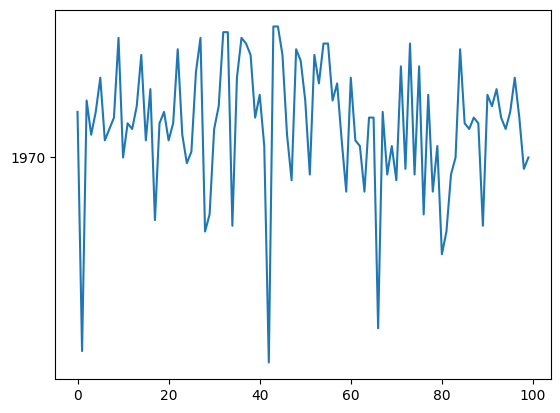

In [41]:
plt.plot(df_movies.year)

In [44]:
df_movies[df_movies.duration.isna()]

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars
36,37,The Cost of Deception,1970-01-01 00:00:00.000002021,NaN,NaN,1.5,40K,['Keith English'],"['Writer', 'Balázs Bendi', '']","['Action', 'Crime', 'Drama']","['Vivianne Bánovits', 'András Mózes', 'Barna B..."
38,39,Enes Batur: Imagination or Reality?,1970-01-01 00:00:00.000002018,NaN,NaN,2.0,56K,['Kamil Cetin'],"['Enes Batur', 'Busra Nur Karahan', 'Enver Sül...",['Comedy'],"['Enes Batur', 'Bilal Hanci', 'Atakan Özyurt']"
43,44,Adipurush,1970-01-01 00:00:00.000002023,NaN,NaN,3.4,131K,['Om Raut'],"['Writers', 'Manoj Muntashir', 'Om Raut', '']","['Action', 'Adventure', 'Drama']","['Kriti Sanon', 'Saif Ali Khan', 'Prabhas']"
71,72,Smolensk,1970-01-01 00:00:00.000002016,NaN,NaN,1.2,40K,['Antoni Krauze'],"['Writers', 'Antoni Krauze', 'Tomasz Lysiak', ...","['Drama', 'Thriller']","['Beata Fido', 'Maciej Póltorak', 'Aldona Stru..."


In [46]:
df_movies.dropna(inplace=True)

In [47]:
df_movies.shape


(96, 11)

In [48]:
df_movies.describe()

,rank,rating
count,96.000000,96.000000
mean,50.604167,2.903125
std,29.469870,0.690302
min,1.000000,1.200000
25%,24.750000,2.500000
50%,51.500000,3.100000
75%,76.250000,3.500000
max,100.000000,3.800000


In [49]:
df_movies.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 96, dtype: bool>

In [51]:
df_movies.dtypes

rank                      int64
name                     object
year             datetime64[ns]
certification            object
duration                 object
rating                  float64
review_count             object
director                 object
writer                   object
genre                    object
stars                    object
dtype: object

In [55]:
print(df_movies.year.value_counts())
print()
print(df_movies.year.min())

1970-01-01 00:00:00.000002007    7
1970-01-01 00:00:00.000002008    5
1970-01-01 00:00:00.000002003    5
1970-01-01 00:00:00.000002005    5
1970-01-01 00:00:00.000002006    5
1970-01-01 00:00:00.000002014    4
1970-01-01 00:00:00.000001997    4
1970-01-01 00:00:00.000002002    4
1970-01-01 00:00:00.000002020    4
1970-01-01 00:00:00.000002004    3
1970-01-01 00:00:00.000002010    3
1970-01-01 00:00:00.000002000    3
1970-01-01 00:00:00.000002009    3
1970-01-01 00:00:00.000002018    3
1970-01-01 00:00:00.000002019    3
1970-01-01 00:00:00.000002011    3
1970-01-01 00:00:00.000001994    3
1970-01-01 00:00:00.000002022    2
1970-01-01 00:00:00.000002013    2
1970-01-01 00:00:00.000001988    2
1970-01-01 00:00:00.000001996    2
1970-01-01 00:00:00.000001990    2
1970-01-01 00:00:00.000001987    2
1970-01-01 00:00:00.000001998    2
1970-01-01 00:00:00.000002012    2
1970-01-01 00:00:00.000002021    2
1970-01-01 00:00:00.000001970    1
1970-01-01 00:00:00.000002017    1
1970-01-01 00:00:00.

In [56]:
df_movies.review_count

0     94K
1     37K
2     25K
3     32K
4     39K
     ... 
95    54K
96    16K
97    51K
98    45K
99    25K
Name: review_count, Length: 96, dtype: object

In [57]:
df_movies['review_count'] = pd.to_numeric(df_movies['review_count'].str.replace('K', '')) * 1000


In [58]:
df_movies.loc[:,['rating','review_count']]

,rating,review_count
0,1.9,94000
1,1.6,37000
2,1.7,25000
3,1.5,32000
4,2.0,39000
...,...,...
95,3.8,54000
96,3.5,16000
97,3.8,51000
98,3.8,45000
